In [1]:
def ldata(archive):      
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data

In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sc
from scipy import stats
import math
from scipy import optimize


red_proteinas=ldata("data/yeast_AP-MS.txt")
red_binarias=ldata("data/yeast_Y2H.txt")
G = nx.Graph()#directed
G.add_edges_from(red_proteinas)
H = nx.Graph()#directed
H.add_edges_from(red_binarias)

In [7]:
def NodoGrado(Grafo):
    Nodos=[]
    for n in Grafo.nodes():
        Nodos.append([nx.degree(Grafo,n),n])
    sorted(Nodos)
    return Nodos 

def K_max(Grafo):
    K=[]
    for n in NodoGrado(Grafo):
       K.append(n[0])
    K_max=max(K)
    return K_max

In [8]:
def k_vec(Grafo):
    Grado_GradoPromVec=[]
    for n in NodoGrado(Grafo):
        Vecinos=nx.all_neighbors(Grafo,n[1])
        K=nx.degree(Grafo,Vecinos)
        k_vecinos=[]
        for i in K:
            k_vecinos.append(i[1])
        if len(K)!=0:
            k_vecinos_promedio=sum(k_vecinos)/len(K)
        else:
            k_vecinos_promedio=0
        Grado_GradoPromVec.append([n[0],k_vecinos_promedio])
    k_nn=[]
    k=[]
    for i in range(1,K_max(Grafo)+1):
        a=0
        b=0
        for n in Grado_GradoPromVec:
            if n[0]==i:
                a+=1
                b+=n[1]
        if a!=0:
            k_nn.append(b/a)
            k.append(i)
    return k,k_nn

In [9]:
F1=k_vec(G) ##proteina
F2=k_vec(H) ##binaria

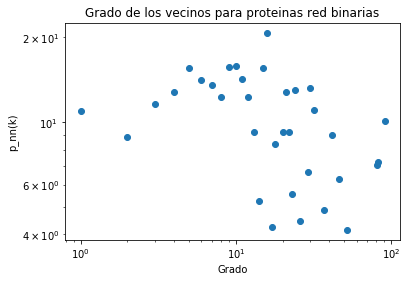

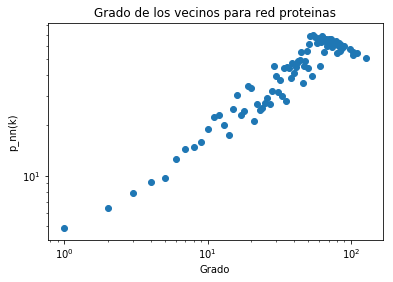

In [15]:
plt.scatter(F2[0],F2[1])
plt.ylabel("p_nn(k)")
plt.xlabel("Grado")
plt.title('Grado de los vecinos para proteinas red binarias')
plt.xscale('log')
plt.yscale('log')
plt.show()
plt.title('Grado de los vecinos para red proteinas')
plt.xscale('log')
plt.yscale('log')
plt.ylabel("p_nn(k)")
plt.xlabel("Grado")
plt.scatter(F1[0],F1[1])
plt.show()

In [16]:
def fiteadora(p,x):
    return p[0]+p[1]*x

def error(p,x,y):
    return fiteadora(p,x)-y

In [19]:
F1logx=[]
for i in F1[0]:
    F1logx.append(np.log(i))
F1logy=[]
for i in F1[1]:
    F1logy.append(np.log(i))

In [22]:
P_ini=[1,0.4]

out= optimize.leastsq(error,P_ini,args=(np.array(F1logx), np.array(F1logy)),full_output=1)
pfinal = out[0]
covar = out[1]
p0err=np.sqrt( covar[0][0] )
p1err= np.sqrt( covar[1][1] )

pfinal  #valores del ajuste

array([1.51258711, 0.59928924])

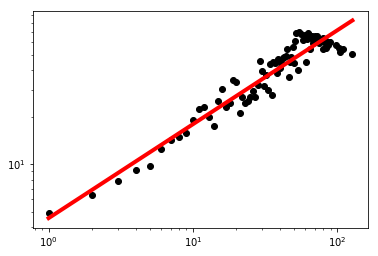

In [23]:
plt.scatter(F1[0],F1[1], color='black')
plt.xscale('log')
plt.yscale('log')
plt.plot(F1[0],(F1[0]**pfinal[1])* math.e**pfinal[0],c="r" ,lw=4)

plt.show()

In [24]:
def r(Grafo):
    Enlaces_k=[]     #Lista de enlaces que también incluye los generos de los nodos del enlace              
    for n in Grafo.edges:
        Enlaces_k.append([n[0],Grafo.degree(n[0]),n[1],Grafo.degree(n[1])])
    se=[]
    for n in Enlaces_k:
        se.append(n[1]*n[3])
    Se=2*sum(se)
    
    s1=[]
    for i in NodoGrado(Grafo):
        s1.append(i[0])
    S1=sum(s1)
        
    s2=[]
    for j in NodoGrado(Grafo):
        s2.append(j[0]**2)
    S2=sum(s2)
    
    s3=[]
    for h in NodoGrado(Grafo):
        s3.append(h[0]**3)
    S3=sum(s3)
    
    return (S1*Se-S2**2)/(S1*S3-S2**2)

In [26]:
print(r(G))
print(r(H))


0.6056742188944484
-0.041067211172400114
